In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob

os.sys.path.append('../')
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load session
mouse = '4139190.1'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
213,4139190.1,15_06_2018,1,TwoTower_noTimeout,56,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
212,4139190.1,15_06_2018,3,TwoTower_noTimeout,48,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
151,4139190.1,16_06_2018,2,TwoTower_noTimeout,59,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
4,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...
225,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...


In [3]:
# load behavior
sess = df_mouse.iloc[0]
VRDat, C = pp.load_scan_sess(sess)
C_z = sp.stats.zscore(C,axis=0)
    

G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
#subsystem#not made into numpy array


In [4]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


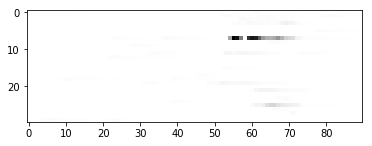

In [5]:
f,ax = plt.subplots()
ax.imshow(C_morph_dict[1][:,:,0],cmap='Greys')
print(trial_info.keys())

In [8]:
# find place cells in 2 extremes from split halves (even-odd) procedure
### something is off here
masks={}
for k in [0,1]:
    print(C_morph_dict[k].shape)
    fr_even, occ_even = np.nanmean(C_morph_dict[k][0::2,:,:],axis=0), occ_morph_dict[k][0::2,:].sum(axis=0)
    occ_even = occ_even/occ_even.sum()
    fr_odd, occ_odd = np.nanmean(C_morph_dict[k][1::2,:,:],axis = 0), occ_morph_dict[k][1::2,:].sum(axis=0)
    occ_odd = occ_odd/occ_odd.sum()

    si_e = u.spatial_info(fr_even,occ_even)
    si_o = u.spatial_info(fr_odd,occ_odd)
    

    
    mask = VRDat['morph']._values==k
    
    fr_all, occ_all = u.rate_map(C[mask,:],VRDat.loc[mask,'pos']._values,bin_size=5)
    si_all = u.spatial_info(fr_all,occ_all/occ_all.sum())
    #for z in zip(si_e.tolist(),si_o.tolist(),si_all.tolist()):
    #    print(z)
    p_e, shuffled_SI = u.spatial_info_perm_test(si_e,C,VRDat['pos'],nperms = 100)
    p_o, shuffled_SI = u.spatial_info_perm_test(si_o,C,VRDat['pos'],nperms = 100,shuffled_SI = shuffled_SI)
    
    
    
    p = np.multiply(p_e>.95,p_o>.95)
    masks[k] = p



(30, 90, 1319)


TypeError: spatial_info_perm_test() missing 2 required positional arguments: 'tstart' and 'tstop'

In [ ]:
# plot place cell results using these cells
    # highlight reward zones

f, ax = plt.subplots(2,2,figsize=[10,15])
fmaps_0 = np.squeeze(C_morph_dict[0][:,:,masks[0]].mean(axis=0))
maxInds_0 = np.argmax(fmaps_0,axis=0)
sort_0 = np.argsort(maxInds_0)

fmaps_1 = np.squeeze(np.nanmean(C_morph_dict[1][:,:,masks[1]],axis=0))
maxInds_1 = np.argmax(fmaps_1,axis=0)
sort_1 = np.argsort(maxInds_1)

ax[0,0].imshow(fmaps_0[:,sort_0].T,cmap='Greys',aspect='auto')
ax[0,1].imshow(np.squeeze(np.nanmean(C_morph_dict[1][:,:,masks[0]],axis=0))[:,sort_0].T,cmap='Greys',aspect='auto')

ax[1,1].imshow(fmaps_1[:,sort_1].T, cmap = 'Greys', aspect = 'auto')
ax[1,0].imshow(np.squeeze(np.nanmean(C_morph_dict[0][:,:,masks[1]],axis=0))[:,sort_1].T,cmap='Greys',aspect='auto')
    

In [8]:
# statistics of place cells

# number in each environment

# number with place fields in both
    # including, excluding reward zones
    
# reward zone cells

# place field shift distribution



In [9]:
# non rewarded lick-triggered average

In [23]:
masks, FR, SI = u.place_cells_split_halves(C, VRDat['pos']._values,trial_info, VRDat['tstart']._values, VRDat['teleport']._values)

In [25]:
print(masks[0])
print(np.where(masks[1]==True)[0])


[ True  True  True ...  True False False]
[   0    1    2    3    4    6    7    8    9   17   20   21   22   26
   28   31   36   37   38   39   40   41   43   44   45   48   49   50
   51   54   60   62   66   67   68   69   71   74   75   79   81   82
   83   84   85   87   88   91   96   97   98   99  102  103  106  108
  109  112  117  118  120  122  123  124  125  127  128  129  135  136
  143  144  145  147  149  150  151  153  154  155  158  164  170  172
  177  178  180  181  183  185  187  191  192  193  199  202  203  204
  209  210  211  216  217  218  219  221  222  225  226  234  236  240
  243  244  245  247  251  252  256  260  261  263  264  265  266  272
  273  274  277  281  284  285  288  289  290  293  294  295  296  300
  301  304  305  306  307  308  310  311  313  315  316  317  321  323
  324  326  329  331  334  336  338  339  340  342  344  345  346  349
  350  351  355  356  357  360  361  369  371  373  375  376  380  381
  382  383  385  386  387  389  391

In [19]:
SI[0]['odd']

array([0.00440896, 0.00768459, 0.00531126, ..., 0.00208628, 0.0026612 ,
       0.00316457])